In [1]:
# -*- coding: utf-8 -*-
"""Modified_Task_1.ipynb

Automatically generated by Jupyter Notebook.

Original file is located at
    https://colab.research.google.com/drive/15-OnIDumGmN3YLS4Lq5eL6Y6oUrohjmY
"""

'Modified_Task_1.ipynb\n\nAutomatically generated by Jupyter Notebook.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/15-OnIDumGmN3YLS4Lq5eL6Y6oUrohjmY\n'

In [4]:
import pandas as pd
import numpy as np

In [ ]:
data_frame = pd.read_csv('/content/Dataset .csv')

In [ ]:
data_frame = data_frame.drop(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Currency'], axis=1)


In [ ]:
data_frame_shape = data_frame.shape

In [ ]:
data_frame_info = data_frame.info

In [ ]:
data_frame_description = data_frame.describe()

In [ ]:
null_values = data_frame.isnull().sum()

In [ ]:
duplicates = data_frame.duplicated().sum()


In [ ]:
data_frame.dropna(inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
import warnings
warnings.filterwarnings("ignore")


<Axes: ylabel='count'>

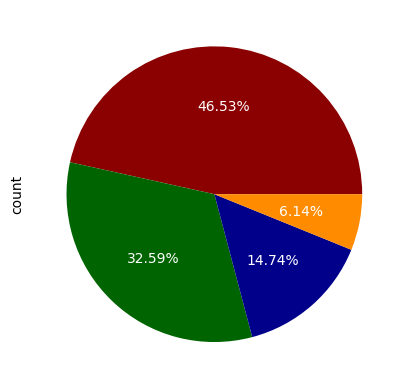

In [ ]:
data_frame['Price range'].value_counts().plot(kind='pie', autopct=lambda p: '{:.2f}%'.format(p), colors=['darkred', 'darkgreen', 'darkblue', 'darkorange'], textprops={'color': 'white'})


Text(0.5, 1.0, 'Price Range Distribution (Dark Colors)')

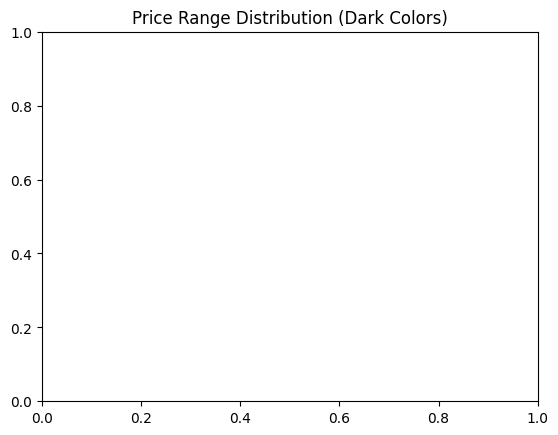

In [ ]:
plt.title('Price Range Distribution (Dark Colors)')

<Axes: ylabel='count'>

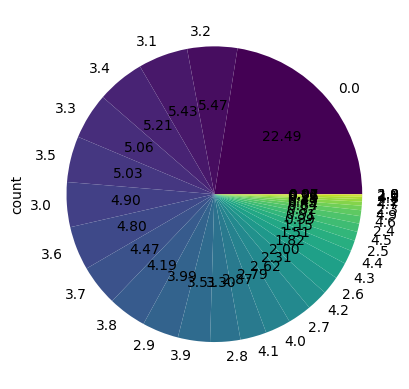

In [ ]:
data_frame['Aggregate rating'].value_counts().plot(kind='pie', autopct='%.2f', colormap='viridis')


Text(0.5, 1.0, 'Aggregate Rating Distribution (Dark Rainbow Colors)')

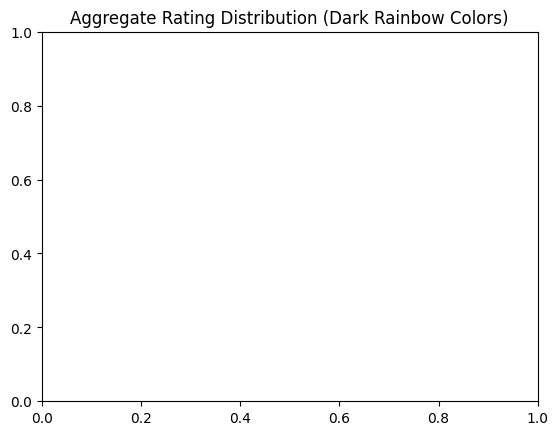

In [ ]:
plt.title('Aggregate Rating Distribution (Dark Rainbow Colors)')


<Axes: xlabel='Aggregate rating', ylabel='Density'>

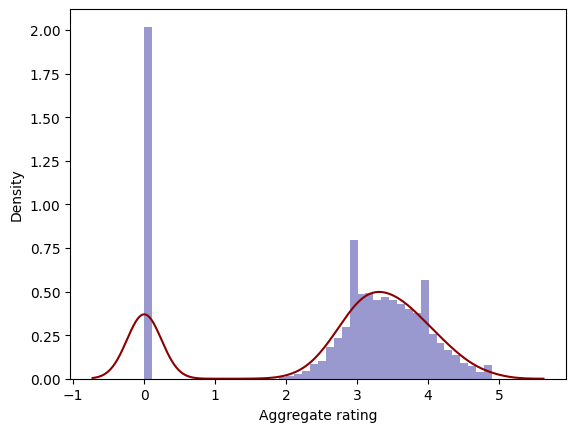

In [ ]:
sns.distplot(data_frame['Aggregate rating'], color='darkblue', kde_kws={'color': 'darkred'})

Text(0.5, 1.0, 'Distribution of Price Ranges')

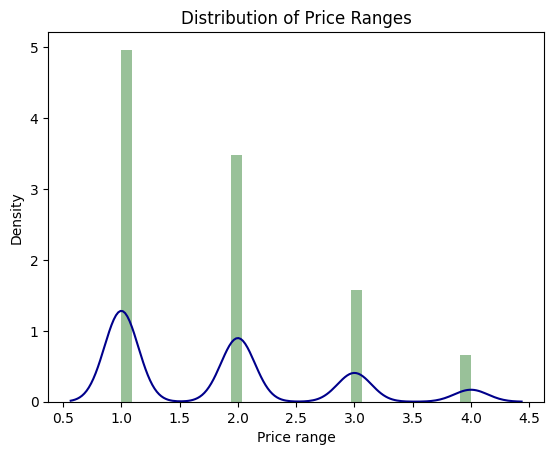

In [ ]:
sns.distplot(data_frame['Price range'], color='darkgreen', kde_kws={'color': 'darkblue'})
plt.title('Distribution of Price Ranges')

Text(0, 0.5, 'Votes')

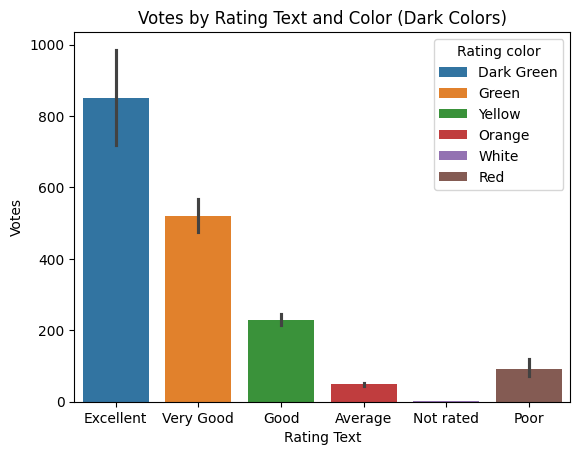

In [ ]:
sns.barplot(x=data_frame["Rating text"], y=data_frame["Votes"], hue=data_frame["Rating color"])
plt.title('Votes by Rating Text and Color (Dark Colors)')
plt.xlabel('Rating Text')
plt.ylabel('Votes')

<Axes: xlabel='Aggregate rating', ylabel='Votes'>

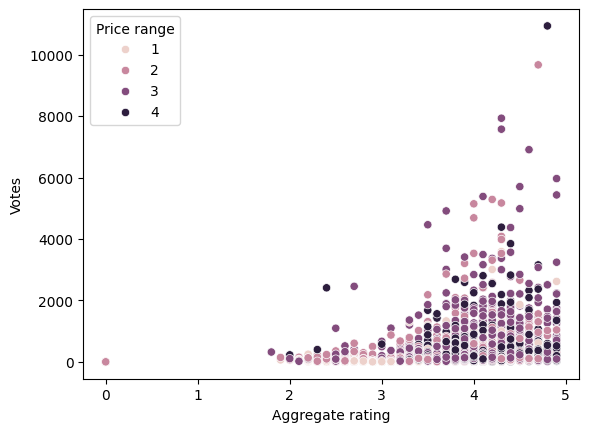

In [ ]:
sns.scatterplot(x=data_frame["Aggregate rating"], y=data_frame["Votes"], hue=data_frame["Price range"])


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
data_frame['Has Table booking'] = label_encoder.fit_transform(data_frame['Has Table booking'])
data_frame['Has Online delivery'] = label_encoder.fit_transform(data_frame['Has Online delivery'])
data_frame['Is delivering now'] = label_encoder.fit_transform(data_frame['Is delivering now'])
data_frame['Switch to order menu'] = label_encoder.fit_transform(data_frame['Switch to order menu'])
data_frame['Rating color'] = label_encoder.fit_transform(data_frame['Rating color'])
data_frame['Rating text'] = label_encoder.fit_transform(data_frame['Rating text'])


In [ ]:
correlation_matrix = data_frame.corr()

<Axes: >

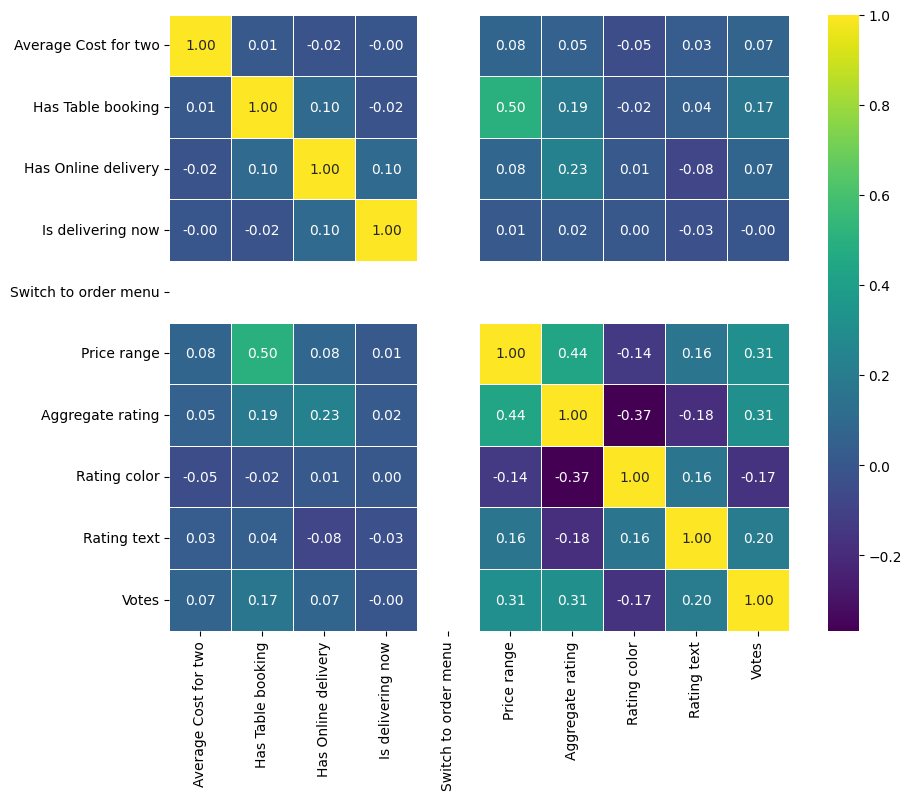

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)


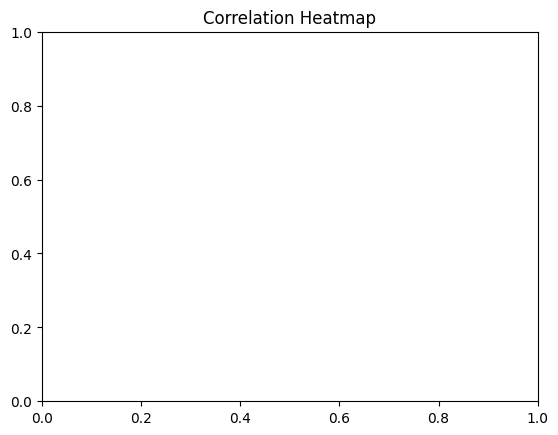

In [ ]:
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
x = data_frame.drop('Aggregate rating', axis=1)
y = data_frame['Aggregate rating']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=353)


In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Error: {r2:.2f}")


Mean Squared Error (MSE): 1.36
R-squared (R2) Error: 0.45


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def train_and_evaluate_decision_tree(x, y, test_size=0.1, random_state=105, min_samples_leaf=0.0001):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    DTree = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
    DTree.fit(x_train, y_train)
    y_predict = DTree.predict(x_test)
    r2 = r2_score(y_test, y_predict)
    print("R-squared score:", r2)


In [ ]:
train_and_evaluate_decision_tree(x, y)


R-squared score: 0.9774387416231225


In [ ]:
DTree = DecisionTreeRegressor(min_samples_leaf=0.0001)
DTree.fit(x_train, y_train)
y_predict = DTree.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error (MSE): {mse:.2f}")
r2 = r2_score(y_test, y_predict)
print(f"R-squared (R2) Error: {r2:.2f}")


Mean Squared Error (MSE): 0.06
R-squared (R2) Error: 0.98


In [ ]:
# MSE of 0.05 indicates that model's predictions are very accurate & low errors
# R2 value of 0.98 suggests that model is highly effective at explaining & predicting the target variable
# Decision Tree Regressor model is performing exceptionally well on your test data.